In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class OrderParameter:

    def __init__(self, N, M, D, ort_filename):
        self.N = N
        self.M = M
        self.D = D
        self.ort_filename = ort_filename
        self.Q = np.zeros((3,3))
        self.saved_s = np.empty(M)
        self.saved_TrQ2 = np.empty(M)
        self.saved_TrQ3 = np.empty(M)
        self.eigenvalues = np.zeros(3)
        self.eigenvectors = np.zeros((3, 3))

    def calculate_order_parameter(self):
        with open(self.ort_filename, 'rb') as f:
            orientation_data = np.fromfile(f, dtype=np.float64) 

        for j in range(self.M):
            for i in range(self.N):
                index = (i * self.D)  + (j * self.D * self.N) 
                x = orientation_data[index]
                y = orientation_data[index + 1]
                z = orientation_data[index + 2]
                self.Q[0,0] += 3*x*x - 1
                self.Q[0,1] += 3*x*y
                self.Q[0,2] += 3*x*z
                self.Q[1,1] += 3*y*y - 1
                self.Q[2,2] += 3*z*z - 1
                self.Q[1,2] += 3*y*z

            self.Q[0,1] = self.Q[1,0]   
            self.Q[0,2] = self.Q[2,0] 
            self.Q[1,2] = self.Q[2,1]

            self.Q /= 2 * self.N 
            Q_sq = np.dot(self.Q, self.Q)
            trQ2 = np.trace(Q_sq)
            Q_cubed = np.dot(Q_sq, self.Q)
            trQ3 = np.trace(Q_cubed)

            eigenvalues, eigenvectors = np.linalg.eig(self.Q)
            s = max(eigenvalues)

            self.saved_s[j] = s
            self.saved_TrQ2[j] = trQ2
            self.saved_TrQ3[j] = trQ3
            
    def save_data(self):
        np.save('order_parameter.npy', self.saved_s)
        np.save('trace_Qsquared.npy', self.saved_TrQ2)
        np.save('trace_Qcubed.npy', self.saved_TrQ3)
    
    def plot_data(self):
        data1 = np.load('order_parameter.npy')
        data2 = np.load('trace_Qsquared.npy')
        data3 = np.load('trace_Qcubed.npy')
        time = np.arange(self.M)

        plt.plot(time, data1, color='red', lw=2, label=r'$s$')
        plt.plot(time, data2, color='green', lw=2, label=r'$TrQ^2$')
        plt.plot(time, data3, color='blue', lw=2, label=r'$TrQ^3$')
        plt.legend(loc='upper right')
        plt.show()

In [16]:
op = OrderParameter(N=500, M=100, D=3, ort_filename='trajort.bin')

In [17]:
op.calculate_order_parameter()

In [18]:
op.save_data()

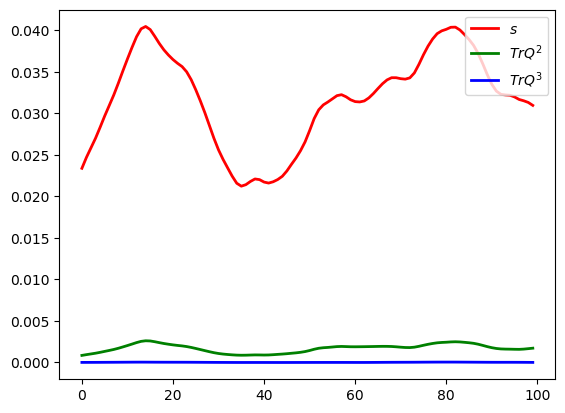

In [19]:
op.plot_data()